# Exercise 3

We generate the same noisy dataset as last time:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


## Plotting the data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

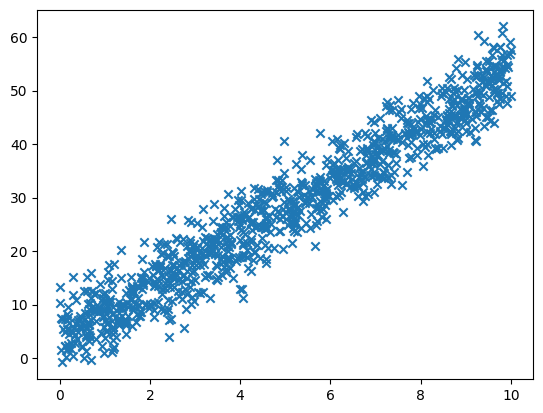

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Setup code

We add an additional column for the bias to the dataset (as per usual):

In [5]:
X_ = np.c_[X, np.ones((X.shape[0]))]

We initialize a weight matrix with random values:

In [6]:
num_samples = X_.shape[0]
num_features = X_.shape[1]

np.random.seed(42)
initial_weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

Here is again the code to load the data in chunks / batches:

In [7]:
from math import ceil

BATCH_SIZE = 100
NUM_BATCHES = int(ceil(float(num_samples)/BATCH_SIZE))

def Loader():
    # This generates the batches, one after another
    # For a large dataset, we could load data from disk here
    for i in range(NUM_BATCHES):
        # Get the i'th slice of data
        batch_X = X_[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_y = y[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        yield batch_X, batch_y

## Tasks
Below, you can find an implementation of stochastic gradient descent (the same as in the `exerscise3_sgd.ipynb` notebook).

Your task in this exercise is to adjust the code by implementing other optimizers:
 - SGD with a momentum of 0.3 (add the momentum term to the existing code)
 - SGD with Nesterov momentum of 0.3 (change the code to use nesterov momentum)
 - Adagrad with a learning rate of 0.1 and $\epsilon=10^{-10}$
 - RMSprop with a learning rate of 0.01, $\rho=0.99$ and $\epsilon=10^{-8}$
 - Adadelta with a learning rate of 1, $\rho=0.9$ and $\epsilon=10^{-6}$
 - Adam with a learning rate of 0.01, $\beta_1=0.9$, $\beta_2=0.999$ and $\epsilon=10^{-8}$

For that, save a copy of this file for each individual optimizer. Adapt the code for the optimizer to implement. The last cell of the notebook writes the loss values of each epoch to a file, which can then be loaded and visualized using the `exercise3_optimizers_comparison.ipynb` notebook. Adjust the value of the `optimizer_name` and `optimizer_count` variables below for each optimizer that you implement, so that the loss curves are not overwritten by the different notebooks.

PS: Of course, implement the optimizers manually and do not just use `torch.optim.*` classes, that would defeat the purpose ;-)
You can use `torch.optim.*` classes as a reference of what the correct result would be, or you can just compare your results to the image in `exercise3_optimizers_comparison.ipynb`, which shows the correct results (the same that you would obtain from using the pytorch optimizers).

In [8]:
weights = initial_weights.copy()

losses = []
LR = 0.1
epsilon = 1e-10  # Set the epsilon value

# Initialize squared gradients to zeros with the same shape as weights
squared_gradients = np.zeros_like(weights)

for epoch in range(1, 301):
    total_loss = 0
    
    # Here we get a new batch of data in every iteration
    # batch_X are the X values, and batch_y are the target values (labels)
    for batch_X, batch_y in Loader():
        # This is the number of data points in the batch (usually equal to BATCH_SIZE, but could be less for the last batch)
        num_batch_samples = len(batch_y)
        
        # This portion of the code is similar to normal (batch) gradient descent, but we use batch_X and batch_y instead of X_ and y
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum() / num_batch_samples
        gradient = -2.0 / num_batch_samples * batch_X.T @ (batch_y - prediction)
        
        # Update squared gradients
        squared_gradients += gradient ** 2
        
        # Update weights using Adagrad
        weights -= LR / ((np.sqrt(squared_gradients) + epsilon) * gradient)
        
        total_loss += L.item() * num_batch_samples
    
    # Calculate the loss for the whole dataset (by weighted summation over the losses of all batches)
    epoch_loss = total_loss / num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    losses.append(epoch_loss)

print(weights)


epoch 1 loss: 1030.593841062044
epoch 100 loss: 1030.473146322638
epoch 200 loss: 1030.4193214887625
epoch 300 loss: 1030.3780504156969
[[-0.17734617]
 [ 0.64081984]]


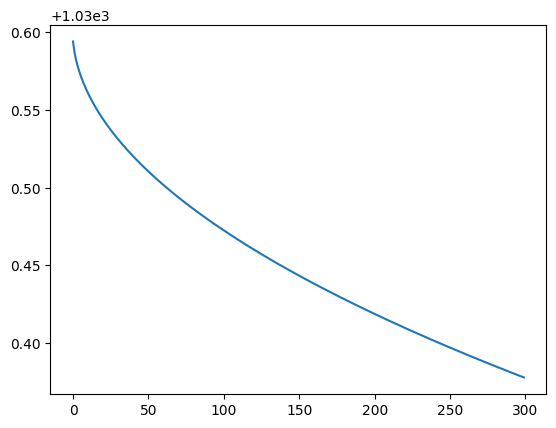

In [9]:
plt.plot(losses)
plt.show()

In [11]:
import pickle
with open("1_adagrad.pickle", "wb") as f:
    pickle.dump(losses, f)